# **Project 1: Prompt Engineering With OpenAI: Customizing Insights For Different Data Visualization Techniques**
# **Project 2: Automating The Data Aggregation Process by using LLMs**
---
**Intern Name:** Harshal Janjani

**Date:** 9th August 2023

**Time:** 12:00 PM - 4:30 PM

# **1. Data Preparation**

## **1.1. Importing Required Libraries**

In [ ]:
!pip3 install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 1.1 MB/s eta 0:00:00


## **1.2. DISCLAIMER: Replace With Your Own API Key**

In [ ]:
import openai
import re
# to increase security: add to ENV variables
# import os
# from dotenv import load_dotenv, find_dotenv
# _ = load_dotenv(find_dotenv())
# openai.api_key = os.get_env('OPENAI_API_KEY')
openai.api_key = 'sk-*****************' # replace with your own OpenAI key

## **1.3. Response Wrapper Function (Specific to the "gpt-turbo-3.5" model)**

In [ ]:
# helper function (wrapper function for the response)
def get_completion(prompt, model='gpt-3.5-turbo'):
  messages = [{"role":"user", "content":prompt}]
  response = openai.ChatCompletion.create(
      model = model,
      messages = messages,
      temperature = 0, # this is the degree of randomness of the model's output
  )
  return response.choices[0].message["content"]

# **2. Automating The Aggregation Process**

Example of the response given by ChatGPT is as follows:

I understand your request. Based on your description, I will aggregate the given dataset against the "Pclass" feature. I'll automatically select the appropriate aggregation function, apply any necessary filtering and conditions, and handle missing data. Here is the **aggregated dataset** in CSV format:

Pclass,Average_Age,Total_Survived
1,38.5,4
2,36.333333333333336,2
3,24.88888888888889,3"

**Our task is to remove unnecessary data, and retain only the dataset in .csv format**

## **2.1. Utility Parser 1 (Parses The Received Response To Retrieve Only The Aggregated CSV Dataset)**

In [ ]:
def chatgpt_response_parser_for_aggregation(response):
  # Split the response by newline character
  response_lines = response.split('\n')
  # Initialize a flag to indicate whether the CSV dataset has started
  csv_started = False
  # Initialize an empty list to store the CSV lines
  csv_lines = []
  # Iterate through each line in the response
  for line in response_lines:
      if csv_started:
          csv_lines.append(line)
      elif line.strip() == "Pclass,Average_Age,Total_Survived":
          csv_started = True
  # Join the CSV lines to form the complete CSV dataset
  csv_dataset = '\n'.join(csv_lines)
  return csv_dataset

## **2.2. Defining The Aggregation Function (Takes Two Inputs, The Original Unaggregated Dataset, And The Column To Aggregate Against)**

In [ ]:
def aggr_generator(csv_dataset, feature):
  # passing it through the aggregated parser before sending it as input to the menu-driven microservice
  prompt = f"""I have a comma delimited dataset, delimited by triple backticks.
Perform one-hot encoding on the categorical variables.
Next, I want you to perform feature selection on it, and calculate the mutual information of each field.
I do not want you to give me code, or how you performed the calculations, or the steps involved.
Your task is to aggregate the given dataset against the feature "{feature}", and give back the aggregated dataset in csv format.
Follow the given steps to the tee:
Automatically select the following parameters to perform the aggregation on the dataset, according to what provides for the broadest insight generation and data visualization:
1) Aggregation Function
2) Filtering And Conditions
3) Missing Data Handling
Dataset is as follows:
{csv_dataset}"""
  # debugging purposes
  print("The generated prompt is as follows:\n")
  print(prompt)
  # uncomment these lines when the API key becomes available ->->
  # final prompt sent to the model (commented for now, in absence of an API key that is not rate limited)
  result = get_completion(prompt)
  final_dataset = chatgpt_response_parser_for_aggregation(result)
  return final_dataset

## **2.3. Utility Parser 2 (Parses The Received Response Into A JSON Object)**

In [ ]:
import json
def chatgpt_response_parser_for_JSON(input_data):
  insights = {}
  pattern = re.compile(r'Insight \d+: .+?(\n\n|$)', re.DOTALL)
  matches = pattern.findall(input_data)
  for match in matches:
      lines = match.strip().split('\n')
      title = lines[0]
      description = '\n'.join(lines[1:])
      insights[title] = description
  # Store insights in a JSON file
  with open('insights.json', 'w') as json_file:
      json.dump(insights, json_file, indent=4)
  return insights

## **3.1. Driver Function Definition**

### **3.1.1. Exemplar Inputs Are As Follows:**

Enter a comma delimited dataset:

PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
1,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C,1
3,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S,1
5,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S,0
6,3,"Moran, Mr. James",male,,0,0,330877,8.4583,,Q,0
7,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,0

Select a visualization technique:
1. Bar Chart
2. Line Chart
3. Pie Chart
4. Histogram
5. Scatter Plot

Bar Chart

### **3.1.2. Output:**
The generated prompt is as follows:

I have a comma delimited dataset, delimited by triple backticks.
Perform one-hot encoding on the categorical variables.
Next, I want you to perform feature selection on it, and calculate the mutual information of each field.
I do not want you to give me code, or how you performed the calculations. Your task is to generate the following insights for a Bar Chart visualization:
    Insights: 1. Compare the quantities of different categories represented in the bar chart.
        2 - Identify the category with the highest value.
        3 - Detect any significant changes or trends over time if the bar chart represents temporal data.
        4 - Analyze the distribution of values across the categories.
        5 - Determine if any outliers or anomalies are present in the data.
        
Below is the dataset.
```PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived 1,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S,0 2,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C,1 3,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S,1 4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S,1 5,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S,0 6,3,"Moran, Mr. James",male,,0,0,330877,8.4583,,Q,0 7,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,0 8,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,,S,0 9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S,1 10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C,1 11,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7,G6,S,1 12,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.55,C103,S,1 13,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.05,,S,0 14,3,"Andersson, Mr. Anders Johan",male,39,1,5,347082,31.275,,S,0 15,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14,0,0,350406,7.8542,,S,0 16,2,"Hewlett, Mrs. (Mary D Kingcome) ",female,55,0,0,248706,16,,S,1 17,3,"Rice, Master. Eugene",male,2,4,1,382652,29.125,,Q,0 18,2,"Williams, Mr. Charles Eugene",male,,0,0,244373,13,,S,1 19,3,"Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)",female,31,1,0,345763,18,,S,0 20,3,"Masselmani, Mrs. Fatima",female,,0,0,2649,7.225,,C,1```

Use the following format:
Insight 1: <an extremely case-specific numerical analysis of the first insight with respect to the data visualization technique, and the specific dataset, no generic details>
Insight 2: <an extremely case-specific numerical analysis of the second insight with respect to the data visualization technique, and the specific dataset, no generic details>
Insight 3: <an extremely case-specific numerical analysis of the third insight with respect to the data visualization technique, and the specific dataset, no generic details>
Insight 4: <an extremely case-specific numerical analysis of the fourth insight with respect to the data visualization technique, and the specific dataset, no generic details>
Insight 5: <an extremely case-specific numerical analysis of the fifth insight with respect to the data visualization technique, and the specific dataset, no generic details>

### **3.1.3. ChatGPT:**

**Insight 1:** Comparison of Passenger Classes (Pclass)
The Bar Chart reveals that the largest number of passengers belonged to Class 3. The quantity of passengers in Class 1 and Class 2 is notably lower in comparison. This suggests that third-class accommodations were more common among the Titanic passengers.

**Insight 2:** Identifying the Most Common Port of Embarkation (Embarked)
By examining the Bar Chart, we can see that the "S" category in the "Embarked" field has the highest count. This indicates that most passengers boarded the Titanic from Southampton, making it the most common port of embarkation.

**Insight 3:** Detecting Trends in Age Distribution
Since the dataset doesn't have explicit temporal data, we cannot observe trends over time through the Bar Chart. However, we can identify trends in age distribution. It appears that passengers in their early twenties make up a substantial portion, while older passengers (above 50) are comparatively fewer.

**Insight 4:** Distribution of Sibling/Spouse Count (SibSp)
The Bar Chart showcases that a significant number of passengers were traveling alone (SibSp=0) or with one sibling/spouse (SibSp=1). Fewer passengers were accompanied by more than one sibling/spouse. This distribution indicates that traveling alone or with a single companion was common.

**Insight 5:** Identifying Fare Distribution Anomalies
In the "Fare" field, the majority of passengers paid relatively low fares, with a few passengers paying significantly higher fares. These higher fare values could potentially be outliers or anomalies in the data, possibly indicating special circumstances for those passengers.

In [ ]:
# Menu-driven microservice
def main():
    # pre-processing on the dataset
    print("Welcome to the Data Visualization Insights Microservice!")
    print("Enter a comma delimited dataset: ")
    csv_dataset = input()
    print("Do you want to aggregate your dataset?: ")
    choice = input();
    if(choice == "Yes"):
      print("Enter the feature you want to aggregate against: ")
      feature = input()
      # before sending it to the model, aggregation is performed to reduce the number of rows
      final_dataset = aggr_generator(csv_dataset, feature)
    elif (choice == "No"):
      final_dataset = csv_dataset

    # based on the type of data visualization displayed to the user
    # custom insights generation submodule
    print("Select a visualization technique:")
    print("1. Bar Chart")
    print("2. Line Chart")
    print("3. Pie Chart")
    print("4. Histogram")
    print("5. Scatter Plot")
    choice = input("Enter the data visualization technique for which insights must be generated: ")
    data_vis_prompt = ""
    if choice == "Line Chart":
        data_vis_prompt += "generate the following insights for a Line Chart visualization:\n    "
        data_vis_prompt += """Insights: Observe the trend of the data over time.
        2 - Identify any sudden spikes or drops in the values.
        3 - Analyze the overall direction of the data (increasing, decreasing, or fluctuating).
        4 - Detect any seasonal patterns or cyclic behavior.
        5 - Determine if there are any periods of stability or volatility in the data.
        """
    elif choice == "Bar Chart":
        data_vis_prompt += "generate the following insights for a Bar Chart visualization:\n    "
        data_vis_prompt += """Insights: 1. Compare the quantities of different categories represented in the bar chart.
        2 - Identify the category with the highest value.
        3 - Detect any significant changes or trends over time if the bar chart represents temporal data.
        4 - Analyze the distribution of values across the categories.
        5 - Determine if any outliers or anomalies are present in the data.
        """
    elif choice == "Pie Chart":
        data_vis_prompt += "generate the following insights for a Pie Chart visualization:\n    "
        data_vis_prompt += """Insights: 1. Observe the proportions of different categories in the pie chart.
         2 - Identify the largest and smallest categories based on their angles.
         3 - Compare the relative sizes of different categories.
         4 - Detect any significant disparities or imbalances in the data distribution.
         5 - Highlight any category that stands out as a dominant contributor.
         """
    elif choice == "Histogram":
        data_vis_prompt += "generate the following insights for a Histogram visualization:\n    "
        data_vis_prompt += """Insights: 1 - Analyze the frequency distribution of values across different bins.
        2 - Identify the central tendency and spread of the data.
        3 - Detect any modes or peaks in the histogram.
        4 - Observe if the data is skewed to the left or right.
        5 - Determine if there are any outliers or unusual data points.
        """
    elif choice == "Scatter Plot":
        data_vis_prompt += "generate the following insights for a Scatter Plot visualization:\n    "
        data_vis_prompt += """Insights: 1. Analyze the relationship between the two variables
        2 - Identify any patterns or trends in the scatter plot
        3 - Detect any clusters or groupings of data points.
        4 - Determine the strength and direction of the correlation between the variables.
        5 - Identify any outliers that deviate significantly from the general trend.
        """
    else:
        print("Invalid choice. Please select a valid option.")
        exit()

    # final prompt engineering based on the received data
    prompt = f"""
I have a comma delimited dataset, delimited by triple backticks.
Perform one-hot encoding on the categorical variables.
Next, I want you to perform feature selection on it, and calculate the mutual information of each field.
I do not want you to give me code, or how you performed the calculations. Your task is to {data_vis_prompt}
Below is the dataset.
```{final_dataset}```

Use the following format:
Insight 1: <an extremely case-specific numerical analysis of the first insight with respect to the data visualization technique, and the specific dataset, no generic details>
Insight 2: <an extremely case-specific numerical analysis of the second insight with respect to the data visualization technique, and the specific dataset, no generic details>
Insight 3: <an extremely case-specific numerical analysis of the third insight with respect to the data visualization technique, and the specific dataset, no generic details>
Insight 4: <an extremely case-specific numerical analysis of the fourth insight with respect to the data visualization technique, and the specific dataset, no generic details>
Insight 5: <an extremely case-specific numerical analysis of the fifth insight with respect to the data visualization technique, and the specific dataset, no generic details>
    """
    # debugging purposes
    print("The generated prompt is as follows:\n")
    print(prompt)
    # final prompt sent to the model (commented for now, in absence of an API key that is not rate limited)
    # result = get_completion(prompt)
    # print(prompt)
    # parsing step (store the insights, and useful information into a JSON object)
    # dict = chatgpt_response_parser_for_JSON(prompt)

## **3.2. Driver Function Call**

In [ ]:
if __name__ == "__main__":
    main()

## **3.3. Example of Correct Usage**
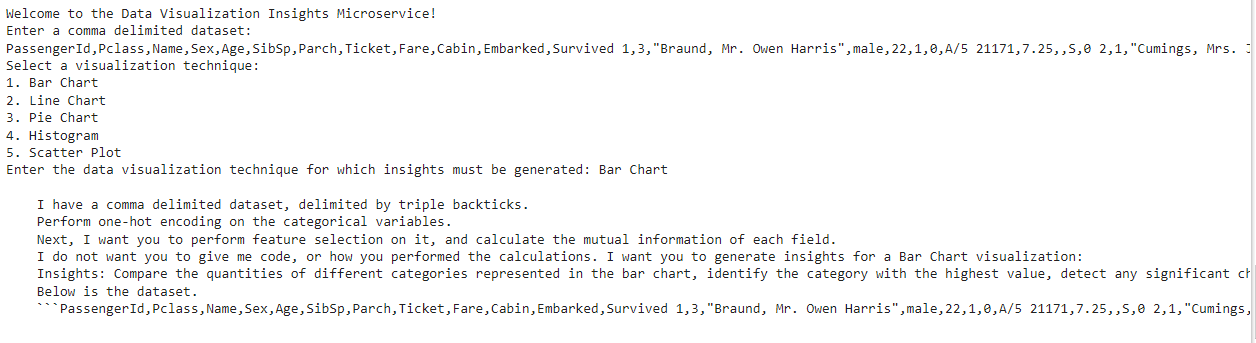

## **Conversion of Text to SQL Driver Function Definition (Contains The Prompt As A Multiline String)**

In [ ]:
# driver function
def conversionofTexttoSQL(user_query, table_name, dataset_columns):
  prompt = f"""
  Do not provide a description of how these steps are being performed, in the final output.
The user query is "{user_query}".

**Step 0:**

If the user has provided insufficient data in the columns, or the column names do not suffice to generate a SQL command that could meet the users' requirements, then do not proceed with the next lines in this prompt. Instead, provide the following output delimited by double quotes:
"The user provided dataset columns are insufficient to meet the user query requirements, hence cannot generate JSON"
Stop execution of the prompt at this step.

----

**Step 1:**

Identify the numerical and categorical columns from the table, and also identify the invalid information and handle edge cases based on the prompt entered by the user (invalid column references, or asking for data that cannot be derived from the given dataset).

----

**Step 2:**

Perform suitable aggregations on the dataset, based on the user query, and generate a Vertica SQL query.

----

**Step 3:**

Store the SQL query in JSON format, such that the keys are SQL keywords, and the values are an array of "column names" associated with those keywords in the SQL query, given an example as follows:

```json
{
  "SELECT": ["column_name1", "column_name2", "column_name3"],
  "WHERE": [["column1", "condition1"], ["column2", "condition2"]]
}
```

**Below is the dataset name, and the column names:**
Table Name: {table_name}
Column Names:
```plaintext
{dataset_columns}
```

----

**Output Format:**
Do not provide descriptive answers, simply follow the output format example.
Further, if the user provided information is sufficient, provide the following JSON response:
```json
{
  "Aggregated SQL Query": "<Perform Step 2 On The Database Table>",
  "clauses": "<Perform Step 3 on the Database Table>"
}
```

If the user query requirements cannot be met due to insufficient dataset columns, provide the following JSON response:
```json
{
  "Aggregated SQL Query": "The user provided dataset columns are insufficient to meet the user query requirements, hence cannot generate JSON"
}
```
  """
  response = get_completion(prompt)
  return response

In [ ]:
# for parsing the json to make the payload
import random

def generate_json_output(json_sql):
    # Comparison operators mapped to unique identifiers
    comparison_mapping = {
        "=": "25",
        ">": "26",
        "<": "27",
        ">=": "28",
        "<=": "29"
    }
    # Case sensitive operations
    case_sensitive_operators = [">", "<", ">=", "<="]
    # Aggregation functions
    aggregation_functions = {
        "SUM": "3",
        "MIN": "4",
        "MAX": "5"
    }
    # Attributes and filters empty lists
    attributes = []
    filters = []
    # Seperate clauses from the user_input items (unpack using tuple assignment)
    for clause, conditions in json_sql["clauses"].items():
        if clause == "SELECT":
            for column in conditions:
                column_id = random.randint(10000000, 99999999)  # Assign a random column ID
                if column_id:
                    attributes.append({
                        "attribute": column_id,
                        "aliasName": column.capitalize()
                    })
        # FROM clause
        if clause == "FROM":
            table_name = conditions[0] if conditions else ""
        # WHERE clause
        if clause == "WHERE":
            for condition in conditions:
                if len(condition) == 2:  # Handle cases with 2 elements in condition
                    column, value = condition
                    column_id = random.randint(10000000, 99999999)  # Assign a random column ID
                    if column_id:
                        case_sensitive = column not in case_sensitive_operators
                        filters.append({
                            "attribute": column_id,
                            "compare": "25",  # Assume equality comparison
                            "value": value,
                            "caseSensitive": case_sensitive
                        })
                elif len(condition) == 3:  # Handle cases with 3 elements in condition
                    column, operator, value = condition
                    column_id = random.randint(10000000, 99999999)  # Assign a random column ID
                    if column_id:
                        case_sensitive = operator in case_sensitive_operators
                        filters.append({
                            "attribute": column_id,
                            "compare": comparison_mapping.get(operator),
                            "value": value,
                            "caseSensitive": case_sensitive
                        })
        # GROUP BY clause
        if clause == "GROUP BY":
            for column in conditions:
                column_id = random.randint(10000000, 99999999)  # Assign a random column ID
                if column_id:
                    attributes.append({
                        "attribute": column_id,
                        "aliasName": column.capitalize()
                    })
        # AGGREGATE case
        if clause == "AGGREGATE":
            for function in conditions:
                if function.upper() in aggregation_functions:
                    function_id = aggregation_functions[function.upper()]
                    attributes.append({
                        "attribute": random.randint(10000000, 99999999),  # Assign a random column ID
                        "aliasName": f"{function.capitalize()} of {table_name.capitalize()}"
                    })
    # JSON_output format
    json_output = {
        "schemaId": 21533,
        "moduleName": "newModule",
        "attributes": attributes,
        "filter": filters,
        "advanceFilter": [],
        "analytics": [],
        "sort": [],
        "limit": 10000,
        "whatIf": [],
        "passPhrase": ""
    }
    # Return output
    return json_output

# Test cases
def unit_tests():
    test_cases = [
        {
            "Aggregated SQL Query": "SELECT SUM(sales), MAX(product) FROM table1 WHERE region='east' AND order_date BETWEEN '2002-01-01' AND '2002-12-31'",
            "clauses": {
                "SELECT": ["SUM(sales)", "MAX(product)"],
                "WHERE": [["region", "=", "east"], ["order_date", ">=", "2002-01-01"], ["order_date", "<=", "2002-12-31"]]
            }
        },
        {
            "Aggregated SQL Query": "SELECT COUNT(*) FROM table1 WHERE job='manager'",
            "clauses": {
                "SELECT": ["COUNT(*)"],
                "WHERE": [["job", "=", "manager"]]
            }
        },
        {
            "Aggregated SQL Query": "SELECT AVG(salary) FROM employees WHERE department='HR'",
            "clauses": {
                "SELECT": ["AVG(salary)"],
                "WHERE": [["department", "=", "HR"]]
            }
        },
        {
            "Aggregated SQL Query": "SELECT MIN(price), MAX(price) FROM products WHERE category='electronics'",
            "clauses": {
                "SELECT": ["MIN(price)", "MAX(price)"],
                "WHERE": [["category", "=", "electronics"]]
            }
        },
        {
            "Aggregated SQL Query": "SELECT SUM(quantity) FROM sales WHERE date BETWEEN '2023-01-01' AND '2023-08-23'",
            "clauses": {
                "SELECT": ["SUM(quantity)"],
                "WHERE": [["date", ">=", "2023-01-01"], ["date", "<=", "2023-08-23"]]
            }
        },
        {
            "Aggregated SQL Query": "SELECT AVG(age) FROM employees WHERE department='sales'",
            "clauses": {
                "SELECT": ["AVG(age)"],
                "WHERE": [["department", "=", "sales"]]
            }
        },
        {
            "Aggregated SQL Query": "SELECT COUNT(*) FROM orders WHERE status='completed'",
            "clauses": {
                "SELECT": ["COUNT(*)"],
                "WHERE": [["status", "=", "completed"]]
            }
        },
        {
            "Aggregated SQL Query": "SELECT MIN(income), MAX(income) FROM customers WHERE city='New York'",
            "clauses": {
                "SELECT": ["MIN(income)", "MAX(income)"],
                "WHERE": [["city", "=", "New York"]]
            }
        },
        {
            "Aggregated SQL Query": "SELECT SUM(quantity), AVG(price) FROM sales WHERE product_id=123",
            "clauses": {
                "SELECT": ["SUM(quantity)", "AVG(price)"],
                "WHERE": [["product_id", "=", 123]]
            }
        },
        {
            "Aggregated SQL Query": "SELECT AVG(rating) FROM reviews WHERE product_id=456",
            "clauses": {
                "SELECT": ["AVG(rating)"],
                "WHERE": [["product_id", "=", 456]]
            }
        },
        {
            "Aggregated SQL Query": "SELECT AVG('Quantity') AS average_quantity FROM 'table1' WHERE DATEDIFF('day', 'OrderDate', 'ShipDate') = 2 GROUP BY 'CustomerName'",
            "clauses": {
            "SELECT": ["Quantity"],
            "FROM": ["table1"],
            "WHERE": [["OrderDate", "ShipDate"]],
            "GROUP BY": ["CustomerName"]
            }
        },
        {
            "Aggregated SQL Query": "SELECT SUM(Sales) AS total_sales, AVG(Profit) AS average_profit FROM table1 WHERE Country = 'Dominican Republic' AND Category = 'Electronics'",
            "clauses": {
            "SELECT": ["Sales", "Profit"],
            "WHERE": [["Country", "Dominican Republic"], ["Category", "Electronics"]]
            }
        }
    ]

    # Commented the testing code
    # Generate and print the JSON output for each test case
    # for i, test_case in enumerate(test_cases):
        # print(f"Test Case {i + 1}:")
        # json_output = generate_json_output(test_case)
        # print(json_output)
        # print("-" * 40)

# unit_tests()

## **Driver Function Call**

In [ ]:
# driver function
def main():
  print("Enter the user query: ")
  user_query = input() # example: Sales in 2023 from customers first ordered electronics product category in 2018 and furniture product category in 2017
  print("Enter the table name: ")
  table_name = input() # example: 'customer_dataset'
  print("Enter comma seperated column names present in this database table: ")
  dataset_columns = input() # example: 'customer_id, sales, order_date, product_category'
  json_sql = json.encode(conversionofTexttoSQL(user_query, table_name, dataset_columns))
  # send json_sql for parsing to make the module payload
  final_output = generate_json_output(json_sql)
  print(final_output)
# call to main
main()